In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe


In [2]:
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility, PortfolioVaR, SharpeRatio, calculate_drawdown,MarginalVaRs
import pandas as pd
# imp.reload(Admin)

In [3]:
userID = "5"

In [4]:
#Initialize admin
test_admin=Admin()
#
test_admin.suggestPortfolio(userID,'2014-04-01')

We are in a good state, target weights with short selling returned


([(0.133, 0.139)], [{'SPY': 1.0}])

In [5]:
test_admin.acceptPortfolio(0)
test_admin.getAccountValue('2014-04-01')

199980.0019998

In [6]:
test_admin.trackPortfolio(rebalance_flag=True,rebalance_freq='3MS',rebal_start_date='2014-09-01')

## Number of Shares Held as of June 1, 2019

In [7]:
pd.DataFrame(test_admin.portfolio['2019-06-01'].portfolio).T.to_clipboard() 
pd.DataFrame(test_admin.portfolio['2019-06-01'].portfolio).T

,Deposit-CAD
SPY,1714.709344


In [8]:
start_date='2014-04-01'
test_admin.getAccountValue(start_date)

199980.0019998

We are in a good state, target weights with short selling returned


199980.0019998

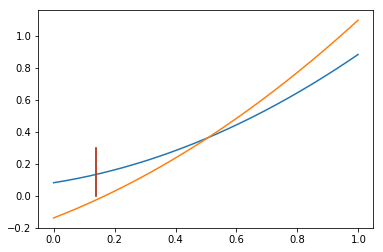

In [9]:
test_admin_norebal=Admin()
#
test_admin_norebal.suggestPortfolio(userID,start_date)
test_admin_norebal.acceptPortfolio(0)
test_admin_norebal.trackPortfolio(rebalance_flag=False)
test_admin_norebal.getAccountValue(start_date)

We are in a good state, target weights with short selling returned


199980.0019998

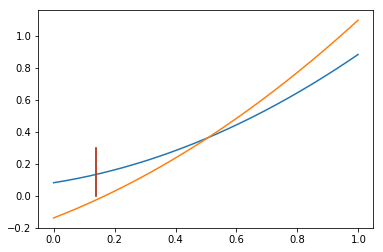

In [10]:
test_admin_norebal_nocash=Admin()
#
test_admin_norebal_nocash.suggestPortfolio(userID,start_date)
test_admin_norebal_nocash.acceptPortfolio(0)
test_admin_norebal_nocash.trackPortfolio(rebalance_flag=False, cash_injections=False)
test_admin_norebal_nocash.getAccountValue(start_date)

In [11]:
from datetime import datetime
date_format='%Y-%m-%d'
today_date=test_admin.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]


In [12]:
portf_values=[]
portf_values_norebal=[]
portf_values_norebal_nocash = []
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))
    portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    portf_values_norebal_nocash.append(test_admin_norebal_nocash.getAccountValue(item))

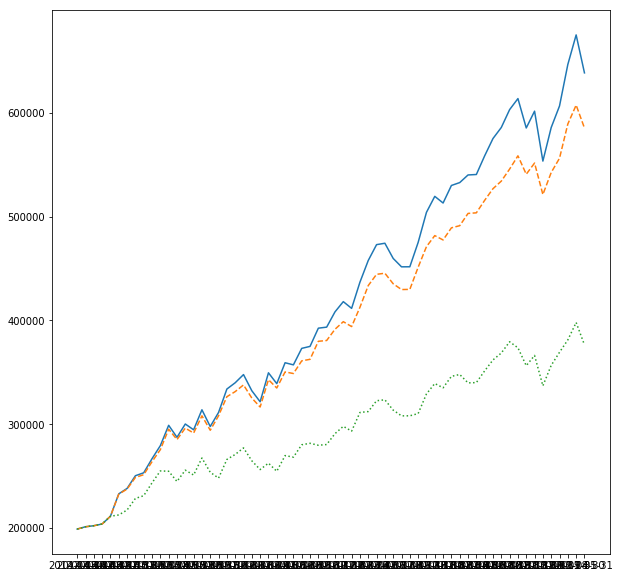

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
plt.plot(all_dates,portf_values_norebal,'--')
plt.plot(all_dates, portf_values_norebal_nocash, ':')

In [14]:
import numpy as np
portfolio1_values=pd.DataFrame([np.float(item) for item in portf_values],index=all_dates,columns=['Rebal'])
portfolio1_values['NoRebal']=[np.float(item) for item in portf_values_norebal]

## Account Balance

In [15]:
test_admin.getAccountValue('2019-06-01')

638386.1121640842

In [16]:
test_admin_norebal.getAccountValue('2019-06-01')

585308.2471194502

In [17]:
test_admin_norebal_nocash.getAccountValue('2019-06-01')

376391.36490244523

In [18]:
# account info
tickers = test_admin.portfolio['2019-06-01'].portfolio.keys()
portofolioInfo = pd.DataFrame()
i = []
a = []
c = []
sec = []
for t in tickers:
    instru = universe.get_security(t)
    i.append(type(instru))
    a.append(instru.get_type_RM())
    try:
        c.append(instru.country)
    except:
        c.append(instru.currency)
    try:
        sec.append(instru.sector)
    except:
        sec.append("NA")
op = [tickers, i, a, c, sec]    
cols = ["Security Ticker", "Instrument Type", "Asset Class", "Country", "Sector"]
for num in range(5):
    portofolioInfo[cols[num]] = op[num]

portofolioInfo

,Security Ticker,Instrument Type,Asset Class,Country,Sector
0,SPY,<class 'Instrument.ETF'>,Equity:USD,USD,NA


## Risk Metrics

In [19]:
start_dates=['2019-03-01', '2018-06-01', "2014-04-01"] 
risk_metrics_table = pd.DataFrame()
for start_date in start_dates:
    risks = []
    risks.append(MeanReturn(test_admin.portfolio,start_date,today_date))
    risks.append(SimpleReturn(test_admin.portfolio,start_date,today_date))
    risks.append(TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    #print(TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,start_date,today_date))
    risks.append(MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    risks.append(Volatility(test_admin.portfolio,start_date,today_date))
    risks.append(SharpeRatio(test_admin.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))
    risks.append(calculate_drawdown(test_admin, start_date, today_date))
    risk_metrics_table[start_date] = pd.Series(risks, index=["Mean Return", "Simple Return", "Time W. Return",
                                                             "Money W. Return","Vol", "Sharpe Ratio", "Max Drawdown"])
risk_metrics_table

,2019-03-01,2018-06-01,2014-04-01
Mean Return,-0.090669,0.100191,0.219137
Simple Return,0.052022,0.131943,0.251719
Time W. Return,-0.070607,0.062680,0.136225
Money W. Return,0.195600,0.210050,0.406419
Vol,0.172304,0.163144,0.127027
Sharpe Ratio,0.167362,0.680532,1.925567
Max Drawdown,-0.054191,-0.098126,-0.098126


#### w/o rebalancing

In [31]:
start_dates=['2019-03-01', '2018-06-01', "2014-04-01"] 
risk_metrics_table = pd.DataFrame()
for start_date in start_dates:
    risks = []
    risks.append(MeanReturn(test_admin_norebal.portfolio,start_date,today_date))
    risks.append(SimpleReturn(test_admin_norebal.portfolio,start_date,today_date))
    risks.append(TimeWeightedReturn(test_admin_norebal.portfolio,test_admin_norebal.cash_transacs,start_date,today_date))
    #print(TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,start_date,today_date))
    risks.append(MoneyWeightedReturn(test_admin_norebal.portfolio,test_admin_norebal.cash_transacs,start_date,today_date))
    risks.append(Volatility(test_admin_norebal.portfolio,start_date,today_date))
    risks.append(SharpeRatio(test_admin_norebal.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))
    risks.append(calculate_drawdown(test_admin_norebal, start_date, today_date))
    risk_metrics_table[start_date] = pd.Series(risks, index=["Mean Return", "Simple Return", "Time W. Return",
                                                             "Money W. Return","Vol", "Sharpe Ratio", "Max Drawdown"])
risk_metrics_table.to_clipboard() 
risk_metrics_table

,2019-03-01,2018-06-01,2014-04-01
Mean Return,-0.046674,0.107320,0.204667
Simple Return,0.046432,0.127169,0.230877
Time W. Return,-0.085541,0.051963,0.113652
Money W. Return,0.203144,0.212071,0.388759
Vol,0.117361,0.117804,0.106952
Sharpe Ratio,0.198084,0.901923,2.092125
Max Drawdown,-0.036394,-0.066779,-0.066779


In [32]:
#### w/o rebalancing w/o cash

start_dates=['2019-03-01', '2018-06-01', "2014-04-01"] 
risk_metrics_table = pd.DataFrame()
for start_date in start_dates:
    risks = []
    risks.append(MeanReturn(test_admin_norebal_nocash.portfolio,start_date,today_date))
    risks.append(SimpleReturn(test_admin_norebal_nocash.portfolio,start_date,today_date))
    risks.append(TimeWeightedReturn(test_admin_norebal_nocash.portfolio,test_admin_norebal_nocash.cash_transacs,start_date,today_date))
    #print(TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,start_date,today_date))
    risks.append(MoneyWeightedReturn(test_admin_norebal_nocash.portfolio,test_admin_norebal_nocash.cash_transacs,start_date,today_date))
    risks.append(Volatility(test_admin_norebal_nocash.portfolio,start_date,today_date))
    risks.append(SharpeRatio(test_admin_norebal_nocash.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))
    risks.append(calculate_drawdown(test_admin_norebal_nocash, start_date, today_date))
    risk_metrics_table[start_date] = pd.Series(risks, index=["Mean Return", "Simple Return", "Time W. Return",
                                                             "Money W. Return","Vol", "Sharpe Ratio", "Max Drawdown"])
risk_metrics_table.to_clipboard() 
risk_metrics_table

,2019-03-01,2018-06-01,2014-04-01
Mean Return,-0.090669,0.030967,0.118195
Simple Return,0.052440,0.060819,0.130123
Time W. Return,-0.145198,-0.044259,-0.008056
Money W. Return,0.310775,0.183574,0.306268
Vol,0.172304,0.155492,0.115166
Sharpe Ratio,0.169785,0.256610,1.068048
Max Drawdown,-0.054191,-0.111885,-0.111885


In [22]:
from Admin import ReturnAttribCurrency

In [23]:
betas, VaRannual=PortfolioVaR(test_admin,start_date,today_date,True)
VaRannual

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


137542.02285957767

In [24]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01','2019-06-01')

(Currency
 USD    0.027392
 Name: Return Contribution, dtype: float64,
 -0.014041527654897745,
 0.012966068282628918)

### Marginal VaRs

In [25]:
# def MarginalVaRs(account,fit_start_date,fit_end_date):
#     #Think about currency
#     #fit model in local currency, aggregate to potfolio level in CAD
#     #when to do conversion for risk metrics???
#     import scipy as sp
#     from HelperFunctions import fill_missing_data_business
#     result_df = pd.DataFrame()
#     factor_tickers = universe._riskFactors.keys()
#     #print(factor_tickers)
#     for k in factor_tickers:
#         result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, fit_start_date, fit_end_date,freq='B')
#     factor_cov=result_df.cov()*252
#     model1={}
#     for item in account.PortfolioWeights.keys():
#         model1[item]=universe.fitFactorModel(item,fit_start_date,252*5).params
#     betas=pd.DataFrame(index=list(model1.keys()),columns=factor_cov.index)
#     for item in model1.keys():
#         betas.loc[item,:]=model1[item].reindex(factor_cov.index,fill_value=0)
# #     print(betas)
#     sec_cov=pd.DataFrame(np.dot(betas,np.dot(factor_cov,betas.transpose())),index=list(model1.keys()),columns=list(model1.keys()))
#     weights=[np.float(item) for item in list(account.PortfolioWeights.values())]
#     portf_vol=np.sqrt(np.dot(weights,np.dot(sec_cov,weights)))
    
#     sec_result_df=np.dot(result_df,betas.transpose())
# #     print(sec_result_df)
# #     sec_result_df_out=sec_result_df.reindex(columns=list(sec_result_df.columns)+['Portfolio'])
# #     sec_result_df_out.loc[:'Portfolio']=
#     portf_series=np.array(np.matmul(np.array(weights),np.array(sec_result_df).astype(float).transpose())).astype(np.float64)
    
#     sec_result_df_out=pd.DataFrame(np.concatenate((sec_result_df,portf_series.reshape(-1,1)),axis=1),columns=list(betas.index)+['Portfolio'],index=result_df.index)
# #     print(sec_result_df_out)

#     result_df_cov=252*sec_result_df_out.astype(np.float64).cov()
# #     print(result_df_cov)
#     betas_new=result_df_cov.loc[:,'Portfolio'].divide(portf_vol**2)    
#     MVaRs=betas_new*sp.stats.norm.ppf(0.95)*portf_vol
#     #now to dollar value
#     cur_doll_val=[]
#     for item in account.PortfolioWeights.keys():
#         cur_doll_val.append(np.float(account.portfolio[fit_end_date].portfolio[item]*universe.get_price_in_currency(item,fit_end_date,'CAD')))
# #     np.multiply(MVaRs[:-1],cur_doll_val)
# #     print(cur_doll_val)
#     return np.multiply(MVaRs[:-1],cur_doll_val)

In [26]:
# from Admin import MarginalVaRs
Mar_vars=MarginalVaRs(test_admin,start_date,today_date)

0.1309859517290881


In [27]:
Mar_vars

,MVaR
SPY,137542


In [28]:
# from Admin import MarginalVaRs
Mar_vars=MarginalVaRs(test_admin,start_date,today_date, True)
Mar_vars

0.1309859517290881


,MVaR
Mkt-RF_log,138662.665439
SMB_log,-578.371001
HML_log,-35.339235
RMW_log,10.993388
CMA_log,-517.925732
Mkt-RF_log_global,0.000000
SMB_log_global,-0.000000
HML_log_global,-0.000000
RMW_log_global,-0.000000
CMA_log_global,-0.000000


In [29]:
from HelperFunctions import fill_missing_data_business
factor_tickers = universe._riskFactors.keys()
    #print(factor_tickers)
result_df = pd.DataFrame()
for k in factor_tickers:
    result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, start_date, today_date,'BM')

In [30]:
result_df['Portfolio']=np.dot(np.dot(result_df,betas.transpose()),weights).astype(numpy.float64)

NameError: name 'weights' is not defined

In [ ]:
new_df=result_df.copy()


In [ ]:
type(new_df['VIX'][0])

In [ ]:
#decomposing security return
def ReturnAttribCurrency(PortfolioWeights,d1,d2):
    df_tmp=pd.DataFrame(index=list(PortfolioWeights.keys()),columns=['Weights','Currency','LocalReturn','CADReturn','FX_appr'])
    for sec_name in PortfolioWeights.keys():
        local_ret=universe.get_security(sec_name).price.loc[today_date]/universe.get_security(sec_name).price.loc['2019-03-01']-1
        report_ret=universe.get_price_in_currency(sec_name,today_date,'CAD')/universe.get_price_in_currency(sec_name,'2019-03-01','CAD')-1
        FX_app=(report_ret-local_ret)/(local_ret+1)

        df_tmp.loc[sec_name,:]=[PortfolioWeights[sec_name],
                                universe.get_security(sec_name).currency,
                                local_ret,
                                report_ret,
                                FX_app]
    df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
    df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
    df_tmp['CurContrWeighted']=df_tmp['FX_appr'].multiply(df_tmp['Weights'])

    cur_contrib=df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()
    local_cur_return=cur_contrib.sum()['LocalReturnWeighted']
    report_cur_return=cur_contrib.sum()['CADReturnWeighted']
    cur_contrib.rename(columns={'CurContrWeighted':'Return Contribution'},inplace=True)
    return cur_contrib['Return Contribution'], local_cur_return, report_cur_return

In [ ]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01',today_date)

In [ ]:
# df_tmp_weighted=
df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
df_tmp['CurContrWeighted']=df_tmp['CurContr'].multiply(df_tmp['Weights'])
# .multiply(df_tmp['Weights'])

In [ ]:
df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()

In [ ]:
SimpleReturn(test_admin.portfolio,'2019-03-01',today_date,False)

In [ ]:
local_return

In [ ]:
np.dot(weights,local_return)

In [ ]:
PortfolioVaR(test_admin,)